#Detecção de Problemas em Softwares

In [ ]:
!pip install boruta

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 1.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
import functions as fun
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Banco de Dados/Detecção de Problemas em Softwares/playground-series-s3e23/train.csv')

In [ ]:
df.shape

(101763, 23)

In [ ]:
df.head()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,5448.79,0.09,302.71,17,1,1,0,16.0,9.0,38.0,22.0,5.0,False
1,1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,936.71,0.05,52.04,11,0,1,0,11.0,11.0,18.0,14.0,3.0,False
2,2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,1754.01,0.07,97.45,8,0,1,0,12.0,11.0,28.0,17.0,3.0,False
3,3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,473.66,0.03,26.31,4,0,2,0,8.0,6.0,16.0,7.0,1.0,True
4,4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,365.67,0.02,20.31,7,0,2,0,7.0,6.0,10.0,10.0,3.0,False


In [ ]:
df.describe()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
count,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,1.017630e+05,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000
mean,50881.000000,37.347160,5.492684,2.845022,3.498826,96.655995,538.280956,0.111634,13.681881,27.573007,2.085359e+04,0.179164,1141.357982,22.802453,1.773945,3.979865,0.196604,11.896131,15.596671,57.628116,39.249698,9.839549
std,29376.592059,54.600401,7.900855,4.631262,5.534541,171.147191,1270.791601,0.100096,14.121306,22.856742,1.905714e+05,0.421844,9862.795472,38.541010,5.902412,6.382358,0.998906,6.749549,18.064261,104.537660,71.692309,14.412769
min,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,25440.500000,13.000000,2.000000,1.000000,1.000000,25.000000,97.670000,0.050000,5.600000,15.560000,5.647300e+02,0.030000,31.380000,7.000000,0.000000,1.000000,0.000000,8.000000,7.000000,15.000000,10.000000,3.000000
50%,50881.000000,22.000000,3.000000,1.000000,2.000000,51.000000,232.790000,0.090000,9.820000,23.360000,2.256230e+03,0.080000,125.400000,14.000000,0.000000,2.000000,0.000000,11.000000,12.000000,30.000000,20.000000,5.000000
75%,76321.500000,42.000000,6.000000,3.000000,4.000000,111.000000,560.250000,0.150000,18.000000,34.340000,1.019324e+04,0.190000,565.920000,26.000000,1.000000,5.000000,0.000000,16.000000,20.000000,66.000000,45.000000,11.000000
max,101762.000000,3442.000000,404.000000,165.000000,402.000000,8441.000000,80843.080000,1.000000,418.200000,569.780000,1.684662e+07,26.950000,935923.390000,2824.000000,344.000000,219.000000,43.000000,410.000000,1026.000000,5420.000000,3021.000000,503.000000


In [ ]:
#Sabendo se tem dados nulo, cardinalidade e tipo das features


def missing_values_table(df):

  metadados = pd.DataFrame({
      'nome_variavel': df.columns,
      'tipos_de_dados': df.dtypes,
      'numero_de_missing': df.isnull().sum(),
      'percentual_de_missing': df.isnull().sum() * 100 / len(df),
      'numero_de_unicos': df.nunique(),
  })

  metadados = metadados.sort_values(by='numero_de_unicos', ascending=False).round(1)
  metadados = metadados.reset_index(drop=True)

  return metadados

metadados = missing_values_table(df)
metadados.head(100)

,nome_variavel,tipos_de_dados,numero_de_missing,percentual_de_missing,numero_de_unicos
0,id,int64,0,0.0,101763
1,e,float64,0,0.0,8729
2,t,float64,0,0.0,8608
3,i,float64,0,0.0,5171
4,v,float64,0,0.0,4515
5,d,float64,0,0.0,3360
6,n,float64,0,0.0,836
7,total_Op,float64,0,0.0,623
8,total_Opnd,float64,0,0.0,485
9,loc,float64,0,0.0,378


In [ ]:
df['defects'] = df['defects'].astype(int)

In [ ]:
df.head(50)

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,5448.79,0.09,302.71,17,1,1,0,16.0,9.0,38.0,22.0,5.0,0
1,1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,936.71,0.05,52.04,11,0,1,0,11.0,11.0,18.0,14.0,3.0,0
2,2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,1754.01,0.07,97.45,8,0,1,0,12.0,11.0,28.0,17.0,3.0,0
3,3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,473.66,0.03,26.31,4,0,2,0,8.0,6.0,16.0,7.0,1.0,1
4,4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,365.67,0.02,20.31,7,0,2,0,7.0,6.0,10.0,10.0,3.0,0
5,5,23.0,4.0,4.0,3.0,69.0,338.21,0.07,14.15,22.81,3772.51,0.11,209.42,17,1,2,0,16.0,10.0,40.0,19.0,7.0,0
6,6,24.0,4.0,1.0,4.0,60.0,294.41,0.08,12.46,24.62,3295.25,0.10,183.07,19,0,3,0,14.0,13.0,40.0,23.0,7.0,0
7,7,14.0,1.0,1.0,1.0,49.0,221.65,0.18,5.47,46.06,1183.48,0.07,65.75,11,0,2,0,7.0,18.0,26.0,23.0,1.0,0
8,8,34.0,10.0,1.0,4.0,122.0,684.98,0.07,14.33,43.43,9941.84,0.23,552.32,29,1,3,0,16.0,29.0,75.0,47.0,19.0,0
9,9,9.0,2.0,1.0,2.0,16.0,55.35,0.11,9.00,6.15,498.16,0.02,27.68,4,0,2,0,9.0,2.0,12.0,4.0,3.0,0


In [ ]:
df.defects.value_counts()

,count
defects,
0,78699
1,23064


##Data Prep

In [ ]:
#Separando Dados para validação

from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.3, random_state=42)
train.shape, test.shape

((71234, 23), (30529, 23))

In [ ]:
#Criando uma copia do banco de dados de treino

df_train_01 = train.copy()

df_train_01.shape

(71234, 23)

In [ ]:
df_train_01.head()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
22212,22212,8.0,1.0,1.0,1.0,39.0,159.41,0.30,3.33,54.47,436.00,0.05,24.22,6,0,0,0,4.0,11.0,19.0,20.0,1.0,0
15992,15992,279.0,37.0,29.0,25.0,772.0,5558.15,0.03,38.91,144.51,213776.70,1.85,11876.48,151,32,37,6,29.0,118.0,459.0,313.0,73.0,1
10606,10606,22.0,2.0,1.0,1.0,44.0,195.00,0.11,9.00,21.67,1755.00,0.07,97.50,17,1,1,0,12.0,10.0,26.0,18.0,3.0,1
64779,64779,24.0,3.0,1.0,2.0,56.0,249.73,0.09,11.00,22.70,2747.01,0.08,152.61,15,0,3,0,13.0,11.0,34.0,22.0,5.0,0
98774,98774,11.0,3.0,1.0,2.0,23.0,92.00,0.14,7.07,13.01,650.57,0.03,36.14,6,2,1,0,11.0,7.0,12.0,11.0,5.0,0


In [ ]:
df_train_01.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71234 entries, 22212 to 15795
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 71234 non-null  int64  
 1   loc                71234 non-null  float64
 2   v(g)               71234 non-null  float64
 3   ev(g)              71234 non-null  float64
 4   iv(g)              71234 non-null  float64
 5   n                  71234 non-null  float64
 6   v                  71234 non-null  float64
 7   l                  71234 non-null  float64
 8   d                  71234 non-null  float64
 9   i                  71234 non-null  float64
 10  e                  71234 non-null  float64
 11  b                  71234 non-null  float64
 12  t                  71234 non-null  float64
 13  lOCode             71234 non-null  int64  
 14  lOComment          71234 non-null  int64  
 15  lOBlank            71234 non-null  int64  
 16  locCodeAndComment  7123

In [ ]:
df_train_01.describe()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
count,71234.000000,71234.000000,71234.000000,71234.000000,71234.000000,71234.000000,71234.000000,71234.000000,71234.000000,71234.000000,7.123400e+04,71234.000000,71234.000000,71234.000000,71234.00000,71234.000000,71234.000000,71234.000000,71234.000000,71234.000000,71234.000000,71234.000000,71234.000000
mean,50866.048095,37.300039,5.502934,2.849650,3.503931,96.517618,535.028815,0.111887,13.686347,27.579649,2.040333e+04,0.178774,1125.893352,22.748730,1.76858,3.976977,0.195188,11.892874,15.569293,57.498133,39.120771,9.853581,0.227097
std,29421.083904,54.072060,7.957731,4.678698,5.754328,168.592208,1187.848415,0.100387,14.113649,22.833805,1.732512e+05,0.413266,9134.701848,37.874039,5.85687,6.308847,0.990770,6.818336,17.392054,101.923304,69.368848,14.441326,0.418958
min,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,25329.000000,13.000000,2.000000,1.000000,1.000000,25.000000,97.670000,0.050000,5.600000,15.600000,5.646300e+02,0.030000,31.380000,7.000000,0.00000,1.000000,0.000000,8.000000,7.000000,15.000000,10.000000,3.000000,0.000000
50%,50876.500000,22.000000,3.000000,1.000000,2.000000,51.000000,232.190000,0.090000,9.820000,23.360000,2.243800e+03,0.080000,124.700000,14.000000,0.00000,2.000000,0.000000,11.000000,12.000000,30.000000,20.000000,5.000000,0.000000
75%,76349.750000,42.000000,6.000000,3.000000,4.000000,110.000000,559.620000,0.150000,18.000000,34.290000,1.014715e+04,0.190000,562.520000,26.000000,1.00000,5.000000,0.000000,16.000000,20.000000,66.000000,44.000000,11.000000,0.000000
max,101761.000000,3442.000000,404.000000,165.000000,402.000000,8441.000000,46943.690000,0.670000,418.200000,569.780000,1.212080e+07,26.950000,673377.600000,2824.000000,344.00000,219.000000,38.000000,410.000000,811.000000,5420.000000,3021.000000,503.000000,1.000000


In [ ]:
#Tirando o target do data prep

df_train_02 = df_train_01.drop('defects', axis = 1)

In [ ]:
import pickle
from sklearn.preprocessing import StandardScaler

# Instanciando o scaler
scaler = StandardScaler()

# Padronizando a base de treino
df_02_scaled = scaler.fit_transform(df_train_02)
df_train_03 = pd.DataFrame(df_02_scaled, columns=df_train_02.columns, index=df_train_02.index)

# Salva o scaler em um arquivo .pkl
with open('/content/drive/MyDrive/Banco de Dados/Detecção de Problemas em Softwares/prd_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [ ]:
df_test_01 = test.copy()

#Tirando o target do data prep

df_test_02 = df_test_01.drop('defects', axis = 1)

In [ ]:
# Carregar os encoders e a lista de colunas
with open('/content/drive/MyDrive/Banco de Dados/Detecção de Problemas em Softwares/prd_scaler.pkl', 'rb') as f:
    loaded_scaler = pickle.load(f)

# Fazendo o enconder na Banco de Dados Test
test_df_scaled = loaded_scaler.transform(df_test_02)
test_df = pd.DataFrame(test_df_scaled, columns=df_test_02.columns, index=df_test_02.index)
test_df.head()


,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
35956,-0.506785,-0.301452,-0.314531,-0.395337,-0.087575,-0.151358,-0.151560,-0.118411,-0.225765,0.293880,-0.095546,-0.142220,-0.099840,-0.151787,-0.301969,-0.313368,-0.197007,0.309040,0.139761,-0.142247,-0.160315,-0.336092
60927,0.341966,-0.153501,-0.188866,-0.395337,-0.261358,-0.175084,-0.184578,-0.317640,-0.063510,-0.001736,-0.093744,-0.166417,-0.097941,-0.151787,0.380995,0.003649,1.821639,0.455705,0.082263,-0.152058,-0.145899,-0.197600
79918,0.987460,0.086921,0.690788,1.314552,0.259992,0.406204,0.284357,-0.616485,0.569216,0.972703,0.037521,0.269140,0.040369,0.270669,-0.131228,0.003649,-0.197007,0.749033,0.772238,0.377756,0.430733,0.771847
50078,-0.026785,-0.541874,-0.565861,-0.395337,-0.435142,-0.530975,-0.433879,2.172729,-0.757169,-0.920994,-0.117428,-0.408394,-0.122896,-0.521435,-0.301969,-0.313368,-0.197007,-0.864275,-0.837704,-0.505267,-0.549541,-0.613077
44080,-0.230654,-0.597356,-0.565861,-0.395337,-0.435142,-0.489454,-0.411266,2.172729,-0.757169,-0.529029,-0.116963,-0.408394,-0.122407,-0.521435,-0.301969,-0.630385,-0.197007,-1.010939,-0.607712,-0.485644,-0.477462,-0.613077


In [ ]:
# Trazer o target para as tabelas pós dataprep

abt_train = df_train_03.merge(train[['defects']], left_index=True, right_index=True, how='inner')
abt_test = test_df.merge(test[['defects']], left_index=True, right_index=True, how='inner')

## Boruta

In [ ]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier

# Define o modelo - Random Forest
rf = RandomForestClassifier()

# Define o método Boruta
feat_selector = BorutaPy(
                         rf,
                         n_estimators='auto',
                         verbose=0,
                         random_state=1)

X = abt_train.drop(axis=1,columns='defects')
y = abt_train.defects

# Executa o Boruta
feat_selector.fit(X.values, y)

# Obtém as variáveis selecionadas
selected_features_boruta = X.columns[feat_selector.support_].tolist()
selected_features_boruta

['loc', 'v', 't']

In [ ]:
import matplotlib.pyplot as plt

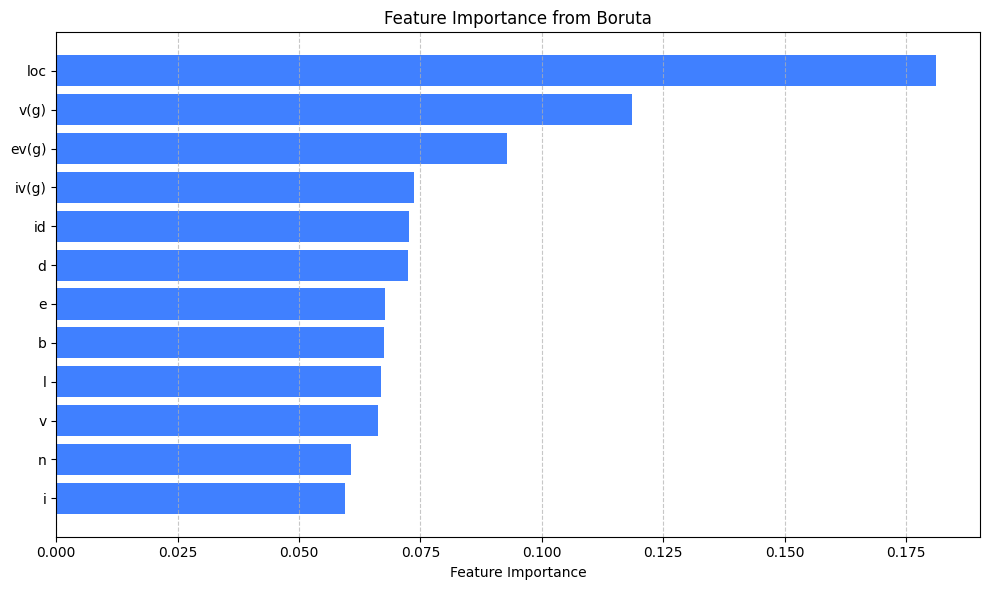

In [ ]:
# Supondo que 'feat_selector' é sua instância BorutaPy e 'X' é seu DataFrame de características
importances = rf.feature_importances_
features = X.columns

# Ordenar as variáveis pela importância
sorted_idx = importances.argsort()

# Visualizar a importância das variáveis em barras horizontais
plt.figure(figsize=(10, 6))
plt.barh(features[sorted_idx], importances[sorted_idx], color=(0.25, 0.5, 1))  # tom de azul claro
plt.xlabel("Feature Importance")
plt.title("Feature Importance from Boruta")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
#Separando o target do banco de dados

X = abt_train.drop(columns = ['defects', 'id'], axis = 1)
y = abt_train['defects']

In [ ]:
#Treinando o modelo com o algortimo Random Forest
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X, y)

RandomForestClassifier()

Será utilizado uma feature do modelo de Random Forest (.feature_importances_) que irá auxiliar na atravês da Gini e Entropia a encontrar quais as variaveis que mais influênciam no modelo.

Numero de features importances selecionadas 14
Features selecionadas ['loc', 'v(g)', 'iv(g)', 'n', 'v', 'd', 'i', 'e', 't', 'lOCode', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount']


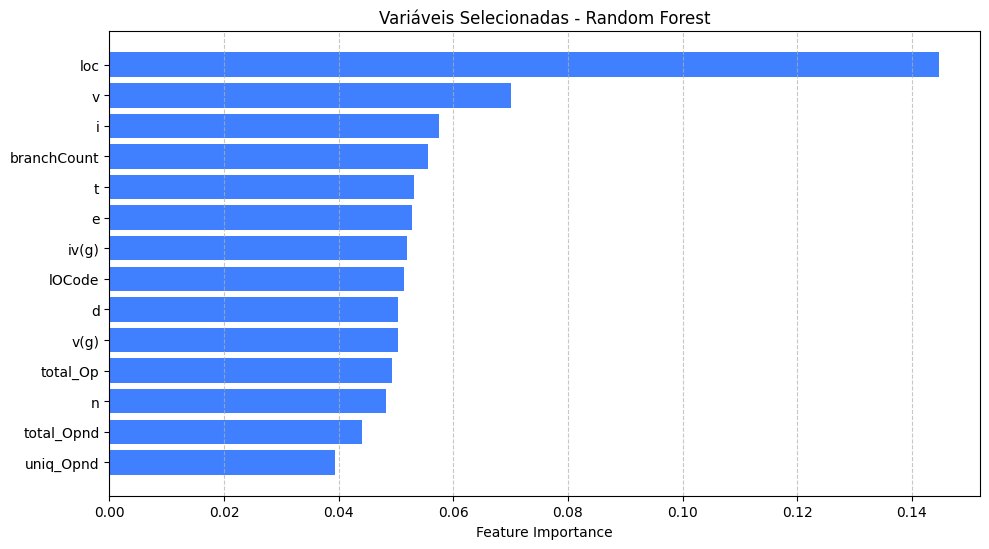

In [ ]:
#Encontrando as variaveis mais importantes
import matplotlib.pyplot as plt


feature_importances = clf.feature_importances_

#Criando um dataframe com as features e a sua importância
feature = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importances})

#Ordenando as variaveis por sua importância
feature.sort_values(by='importance', ascending=False)

#Estabelecendo um limite de corte para as feature importances
cutoff_max = 0.25

cut_off = cutoff_max * feature_importances.max()

#Selecionando Variaveis acima do limite

selected_features = X.columns[feature_importances > cut_off].tolist()

print(f'Numero de features importances selecionadas {len(selected_features)}')
print(f'Features selecionadas {selected_features}')

#Ordenando as variaveis selecionadas
features = feature.sort_values(by='importance', ascending=True)

#Filtrar o dataframe para apenas features acima da corte
selected_features_df = features[features['importance'] > cut_off]

# Ajusta o tamanho da figura com base no número de features selecionadas
plt.figure(figsize=(10, len(selected_features_df)*0.4))

# Plota as features selecionadas
plt.barh(selected_features_df['feature'], selected_features_df['importance'], color=(0.25, 0.5, 1))
plt.xlabel("Feature Importance")
plt.title("Variáveis Selecionadas - Random Forest")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
#Salvando a lista de variaveis
import pickle

with open ('/content/drive/MyDrive/Banco de Dados/Detecção de Problemas em Softwares/prd_list_features_boruta_a014.pkl', 'wb') as f:
  pickle.dump(selected_features_boruta, f)

In [ ]:
#Carregar a lista de variaveis

with open('/content/drive/MyDrive/Banco de Dados/Detecção de Problemas em Softwares/prd_list_features_boruta_a014.pkl', 'rb') as f:
  selected_features = pickle.load(f)

In [ ]:
lista_features = selected_features + ['defects']
abt_train_02 = abt_train[lista_features]
abt_train_02.head()

,loc,v,t,defects
22212,-0.541874,-0.316220,-0.120604,0
15992,4.469992,4.228786,1.176903,1
10606,-0.282958,-0.286258,-0.112582,1
64779,-0.245971,-0.240183,-0.106549,0
98774,-0.486392,-0.372970,-0.119299,0


In [ ]:
#Aplicando a lista de variaveis na tabela test

abt_test_02 = abt_test[lista_features]
abt_test_02.head()


,loc,v,t,defects
35956,-0.301452,-0.151560,-0.099840,0
60927,-0.153501,-0.184578,-0.097941,1
79918,0.086921,0.284357,0.040369,0
50078,-0.541874,-0.433879,-0.122896,0
44080,-0.597356,-0.411266,-0.122407,0


In [ ]:
#Salvando variaveis feature selection

In [ ]:
#Salvando em CSV

abt_train_02.to_csv('/content/drive/MyDrive/Banco de Dados/Detecção de Problemas em Softwares/df_train_02_boruta.csv', index=False)
abt_test_02.to_csv('/content/drive/MyDrive/Banco de Dados/Detecção de Problemas em Softwares/df_test_02_boruta.csv', index=False)

## Modelos

In [ ]:
df_train_04 = pd.read_csv('/content/drive/MyDrive/Banco de Dados/Detecção de Problemas em Softwares/df_train_02_boruta.csv')

In [ ]:
#Para efeito de verificação, será feito uma verificação na variavel target para ver como os efeitos estão ocorrendo

evento = df_train_04['defects'].value_counts()

print(evento)

#Verificando a porcentagem em cima do total das variavel atarget

porcentagem = df_train_04['defects'].value_counts(normalize=True) * 100

print(porcentagem)

defects
0    55057
1    16177
Name: count, dtype: int64
defects
0    77.290339
1    22.709661
Name: proportion, dtype: float64


Undersampling

In [ ]:
# amostragem para evento e não evento
evento = df_train_04[df_train_04['defects'] == 1]
nevento = df_train_04[df_train_04['defects'] == 0]

# Amostragem aleatória dos negativos (reprodutível)
negativos_amostra = nevento.sample(n=len(evento), random_state=42)

# Concatenar as duas partes para obter a amostra balanceada
amostra_balanceada = pd.concat([evento, negativos_amostra])

# Embaralhar os dados (também reprodutível)
amostra_balanceada = amostra_balanceada.sample(frac=1, random_state=42).reset_index(drop=True)

amostra_balanceada.shape

(32354, 4)

In [ ]:
# Separando o Banco de Dados

X = amostra_balanceada.drop(columns = 'defects', axis = 1)
y = amostra_balanceada['defects']

#Separando a amostra em treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((22647, 3), (9707, 3), (22647,), (9707,))

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
import numpy as np

# Definindo o modelo
model = LogisticRegression(max_iter=100)
model_sgs = LogisticRegression(max_iter=100)


# Definindo os parâmetros para o grid search
param_grid = {
    'penalty':['l1','l2'],
    'tol':[0.00001,0.0001,0.001],
    'C': [1.0, 2.0],
    'solver':['liblinear', 'saga'],
    'class_weight': [None, 'balanced', {0: 1, 1: 2}, {0: 2, 1: 1}]
}



# Calculando a quantidade total de modelos que serão treinados
num_models = len(param_grid['penalty']) * len(param_grid['tol']) * len(param_grid['C']) * len(param_grid['solver']) * 5  # 5 é o número de folds na validação cruzada (cv)
print(f"Total de Modelos a serem Treinados: {num_models}")

# Definindo o objeto GridSearchCV
grid_rf = GridSearchCV(model,
                    param_grid,
                    cv=5,
                    scoring='roc_auc',
                    n_jobs=-1)

# Treinando o modelo com o grid search
grid_rf.fit(X_train, y_train)


# Exibindo os melhores parâmetros encontrados pelo grid search
print("Melhores Parâmetros: ", grid_rf.best_params_)

# Exibindo a melhor pontuação (score) atingida pelo modelo com os melhores parâmetros
print("Melhor AUC: ", grid_rf.best_score_)

# Utilizando o melhor modelo para fazer previsões
predictions = grid_rf.best_estimator_.predict(X_test)
predprob = grid_rf.best_estimator_.predict_proba(X_test)[:, 1]

best_model_rl = grid_rf.best_estimator_

# Cálculo do coeficiente de Gini
gini_rl = round(2 * roc_auc_score(y_test, predprob) - 1, 3)
print(f"Gini: {gini_rl}")

Total de Modelos a serem Treinados: 120
Melhores Parâmetros:  {'C': 1.0, 'class_weight': {0: 1, 1: 2}, 'penalty': 'l1', 'solver': 'saga', 'tol': 0.001}
Melhor AUC:  0.7871258877263256
Gini: 0.562


/content/pod_academy_functions.py:232: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decile_analysis = y_test.groupby(deciles).mean()
/content/pod_academy_functions.py:243: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decile_analysis_train = y_train.groupby(deciles_train).mean()


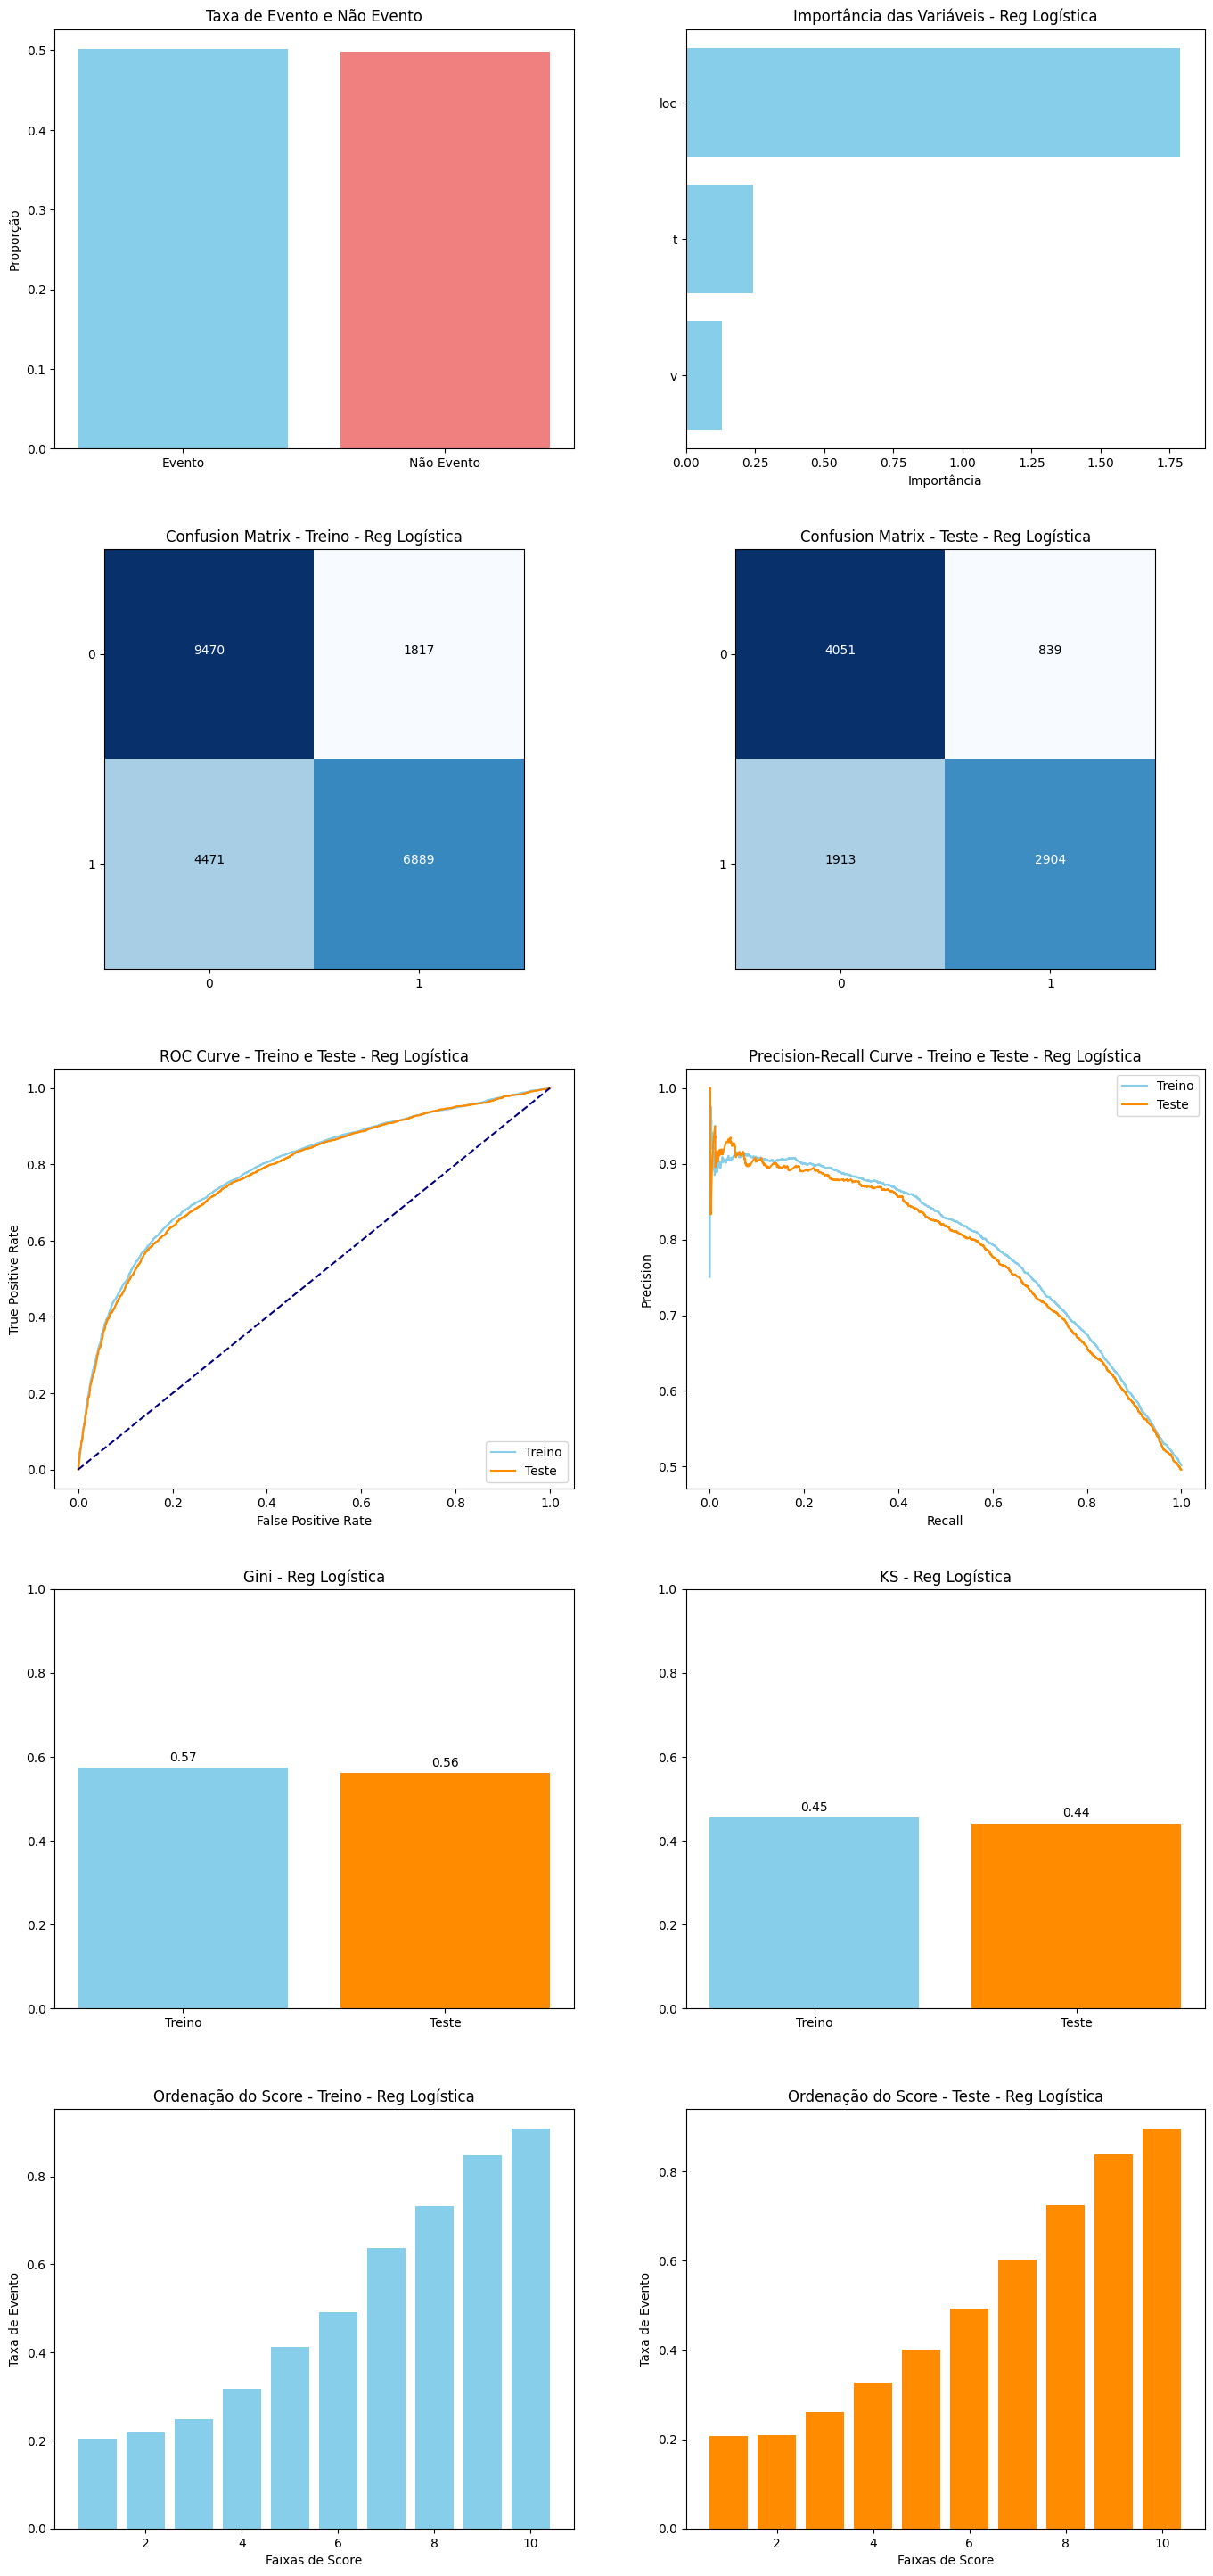

In [ ]:
fun.avaliar_modelo(X_train, y_train, X_test, y_test, model_sgs,nm_modelo='Reg Logística')

### Árvore de Decisões

In [ ]:
# Gerando o modelo sem Grid Search
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

# Definindo o modelo
modelo_DTC_1 = DecisionTreeClassifier(random_state=42)

# Treinando o modelo
modelo_DTC_1.fit(X_train, y_train)

# Previsões do modelo
predictions = modelo_DTC_1.predict(X_test)
predprob = modelo_DTC_1.predict_proba(X_test)[:, 1]

# Cálculo do coeficiente de Gini
gini_n = round(2 * roc_auc_score(y_test, predprob) - 1, 3)
print(f"Gini: {gini_n}")

Gini: 0.252


/content/pod_academy_functions.py:232: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decile_analysis = y_test.groupby(deciles).mean()
/content/pod_academy_functions.py:243: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decile_analysis_train = y_train.groupby(deciles_train).mean()


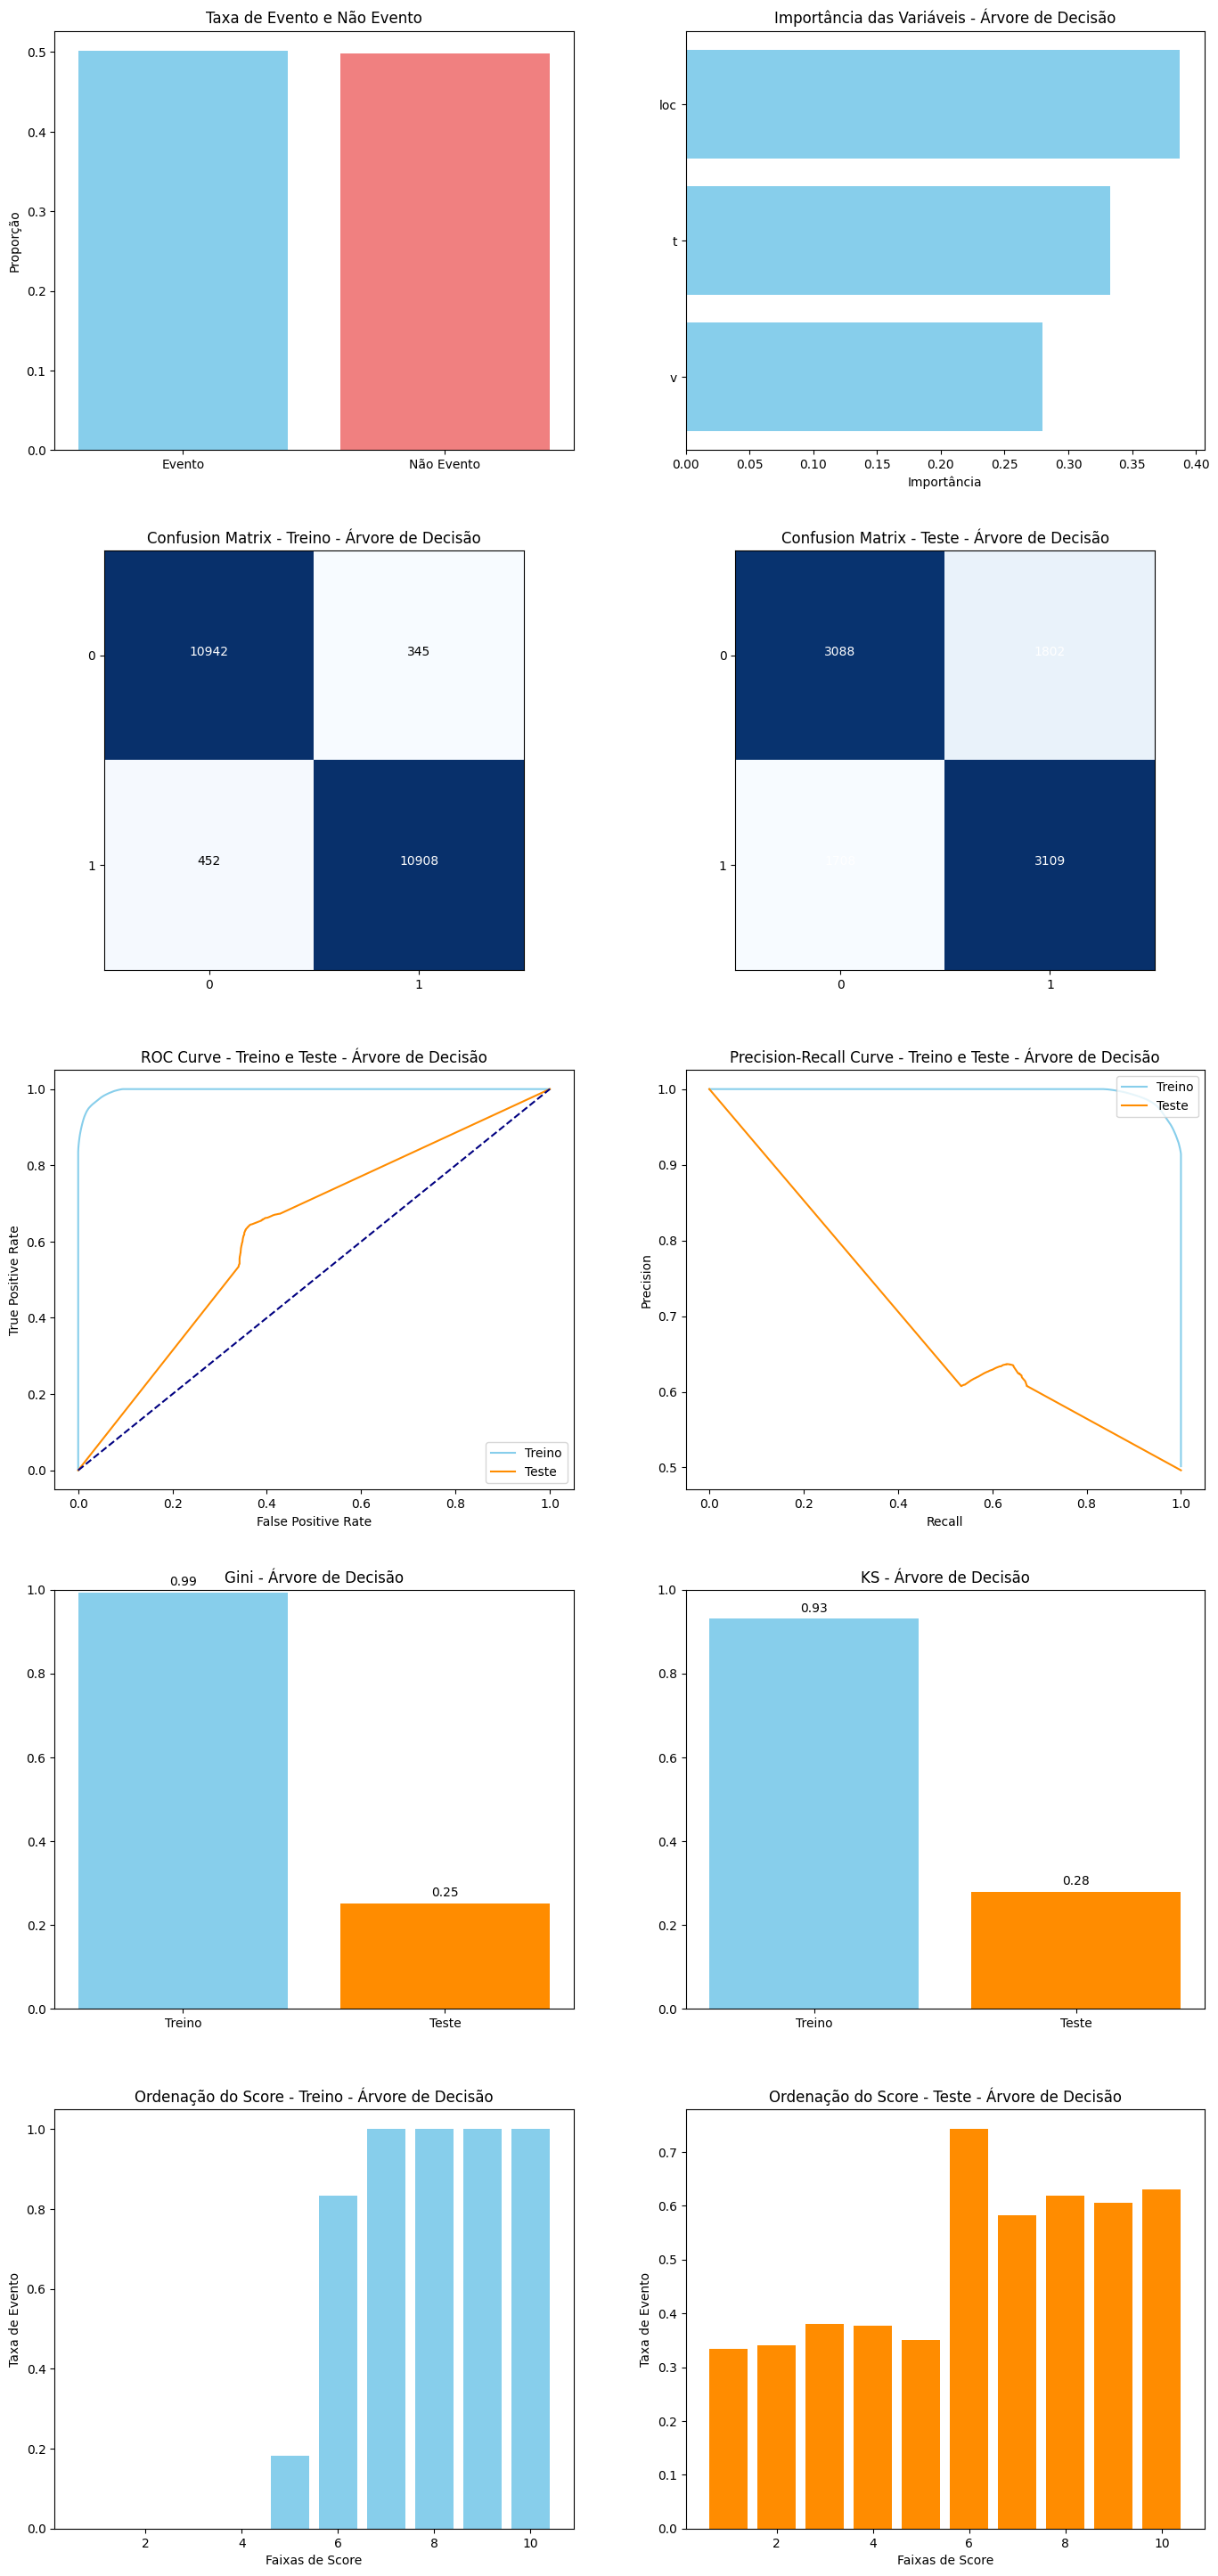

In [ ]:
fun.avaliar_modelo(X_train, y_train,X_test, y_test,modelo_DTC_1, nm_modelo='Árvore de Decisão')

In [ ]:
# Arvore de Decisões
from inspect import Parameter
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import numpy as np

#Definindo o modelo
modelo_DTC = DecisionTreeClassifier(random_state = 42)

#Definindo os paramatros para o Grid Search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'splitter': ['best', 'random'],
    'min_samples_leaf': [0.01, 0.02, 0.04]
}

#Calculando a quantidade de modelo a serem treinados
n_models = np.prod([len(param_grid[param]) for param in param_grid])
print(f'Número de modelos a serem treinados: {n_models}')

#Criando o Grid Search
grid = GridSearchCV(modelo_DTC,
                    cv = 5,
                    param_grid = param_grid,
                    scoring = 'roc_auc',
                    n_jobs = -1)

#Treinando o modelo
grid.fit(X_train, y_train)

#Exibindo os melhores Parametros
print(f'Melhores Parametros: {grid.best_params_}')

#Exibindo a melhor pontuação atingida com os hiperparametros
print(f'Melhor AUC: {grid.best_score_}')

#Utilizando os modelos para fazer previsões
predictions = grid.best_estimator_.predict(X_test)
predprob = grid.best_estimator_.predict_proba(X_test)[:, 1] # Use predict_proba for AUC

gini_n = round(2 * roc_auc_score(y_test, predprob) - 1, 3)
print(f'Gini: {gini_n}')

best_model = grid.best_estimator_

Número de modelos a serem treinados: 144
Melhores Parametros: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 0.02, 'min_samples_split': 2, 'splitter': 'best'}
Melhor AUC: 0.7878625778558951
Gini: 0.564


/content/pod_academy_functions.py:232: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decile_analysis = y_test.groupby(deciles).mean()
/content/pod_academy_functions.py:243: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decile_analysis_train = y_train.groupby(deciles_train).mean()


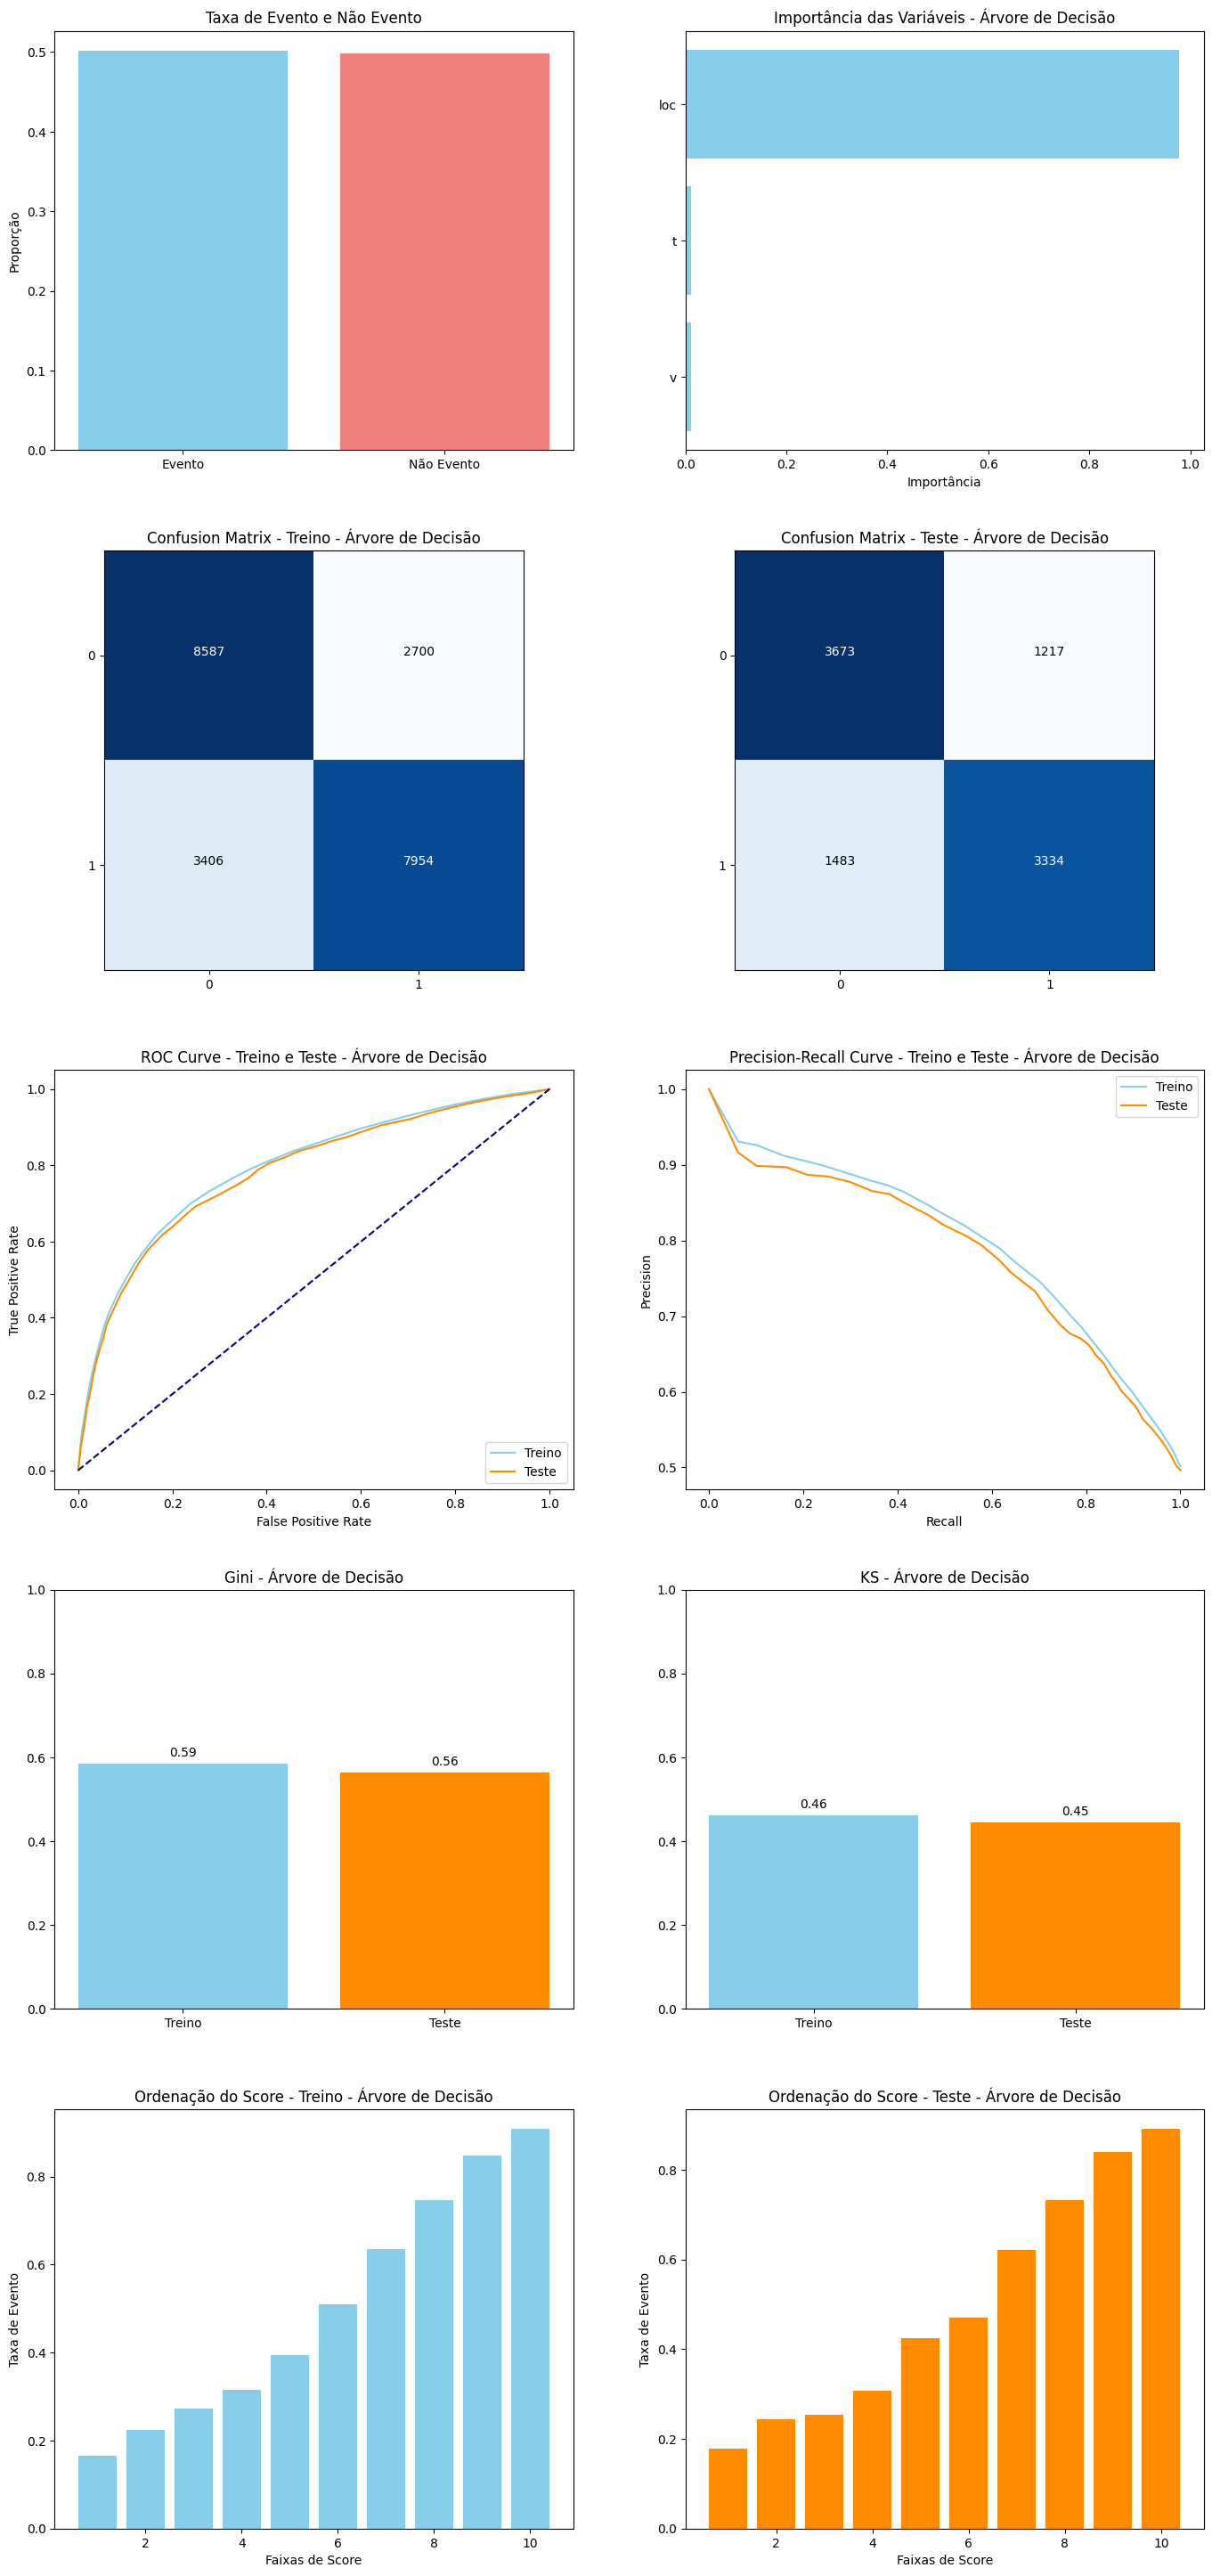

In [ ]:
fun.avaliar_modelo(X_train, y_train,X_test, y_test,best_model, nm_modelo='Árvore de Decisão')

###Floresta de Decisões

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Definindo o modelo
modelo_FDC = RandomForestClassifier(random_state=42)

# Definindo os parâmetros para o grid search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

#Definindo os paramatros para o Grid Search
grid_FDC = GridSearchCV(
    estimator=modelo_FDC,
    param_grid=param_grid,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2
)

# Treinando o modelo
grid_FDC.fit(X_train, y_train)

# Resultados
print("Melhores Parâmetros: ", grid_FDC.best_params_)
print("Melhor AUC: ", grid_FDC.best_score_)

# Previsões
predictions = grid_FDC.best_estimator_.predict(X_test)
predprob = grid_FDC.best_estimator_.predict_proba(X_test)

# Gini normalizado
gini_RF = round(fun.gini_normalizado(y_test, predprob[:, 1]), 2)
print('Gini normalizado --> ', gini_RF)

# Guardando o melhor modelo
best_model_rf = grid_FDC.best_estimator_

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Melhores Parâmetros:  {'bootstrap': True, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Melhor AUC:  0.7883379773591296
Gini normalizado -->  0.56


/content/pod_academy_functions.py:232: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decile_analysis = y_test.groupby(deciles).mean()
/content/pod_academy_functions.py:243: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decile_analysis_train = y_train.groupby(deciles_train).mean()


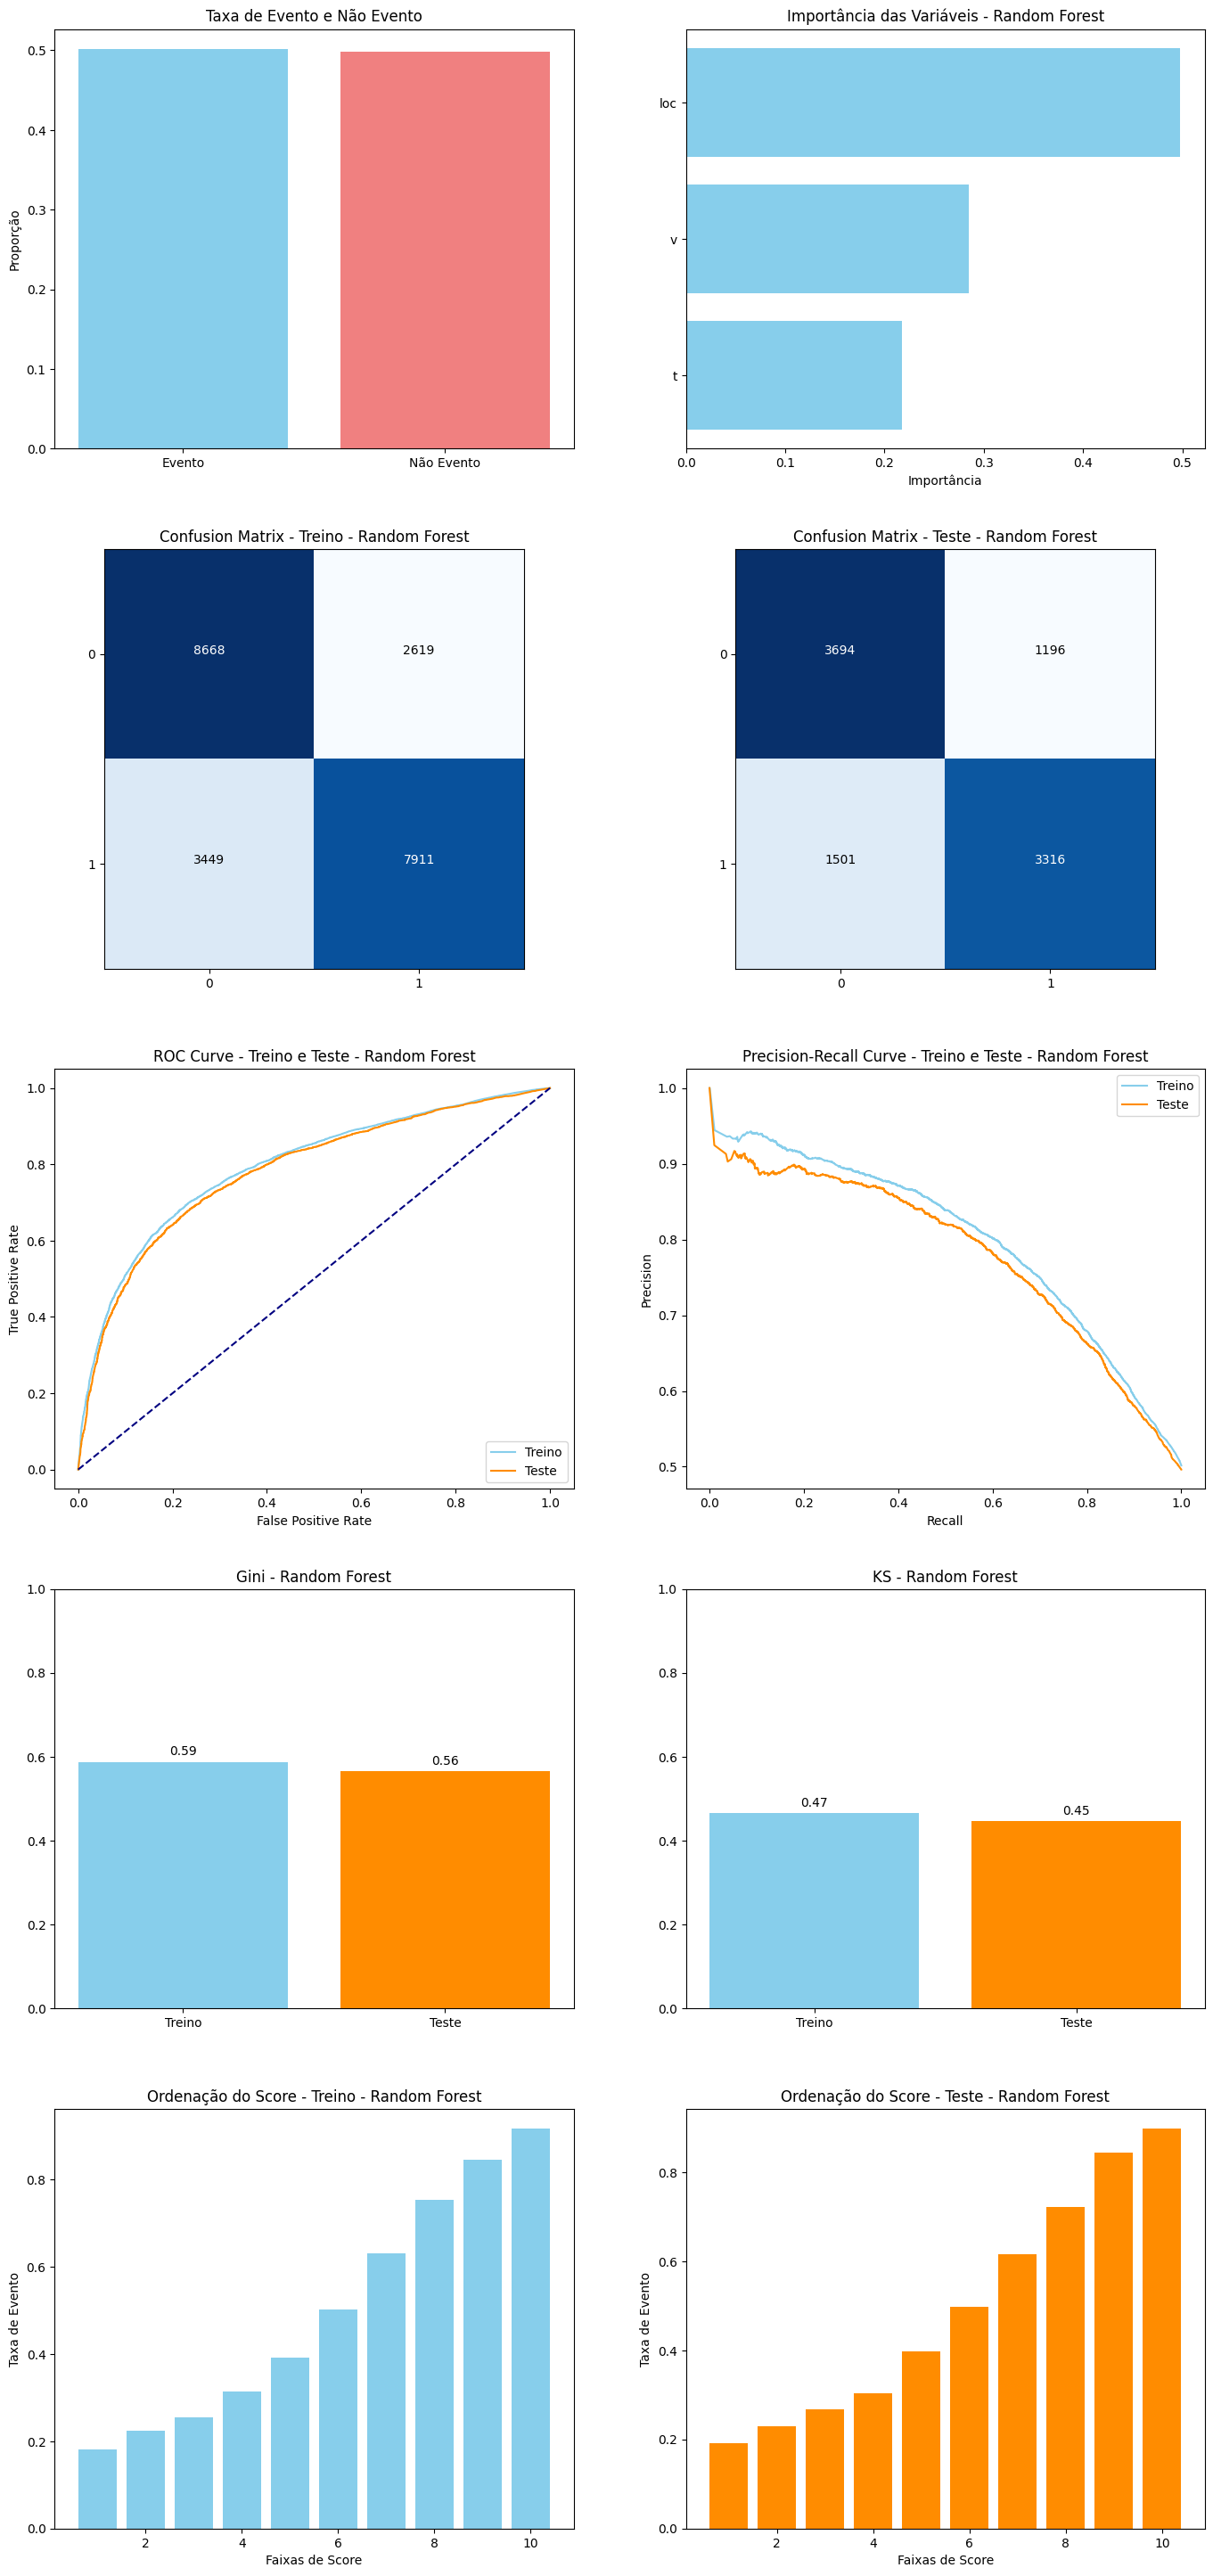

In [ ]:
fun.avaliar_modelo(X_train, y_train,X_test, y_test,best_model_rf, nm_modelo='Random Forest')

###XgBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Definindo o modelo
modelo_XGB = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Definindo os parâmetros para o grid search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'gamma': [0, 0.1],
    'min_child_weight': [1, 5]
}

#Definindo os paramatros para o Grid Search
grid_XGB = GridSearchCV(
    estimator=modelo_XGB,
    param_grid=param_grid,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2
)

# Treinando o modelo
grid_XGB.fit(X_train, y_train)

# Resultados
print("Melhores Parâmetros: ", grid_XGB.best_params_)
print("Melhor AUC: ", grid_XGB.best_score_)

# Previsões
predictions = grid_XGB.best_estimator_.predict(X_test)
predprob = grid_XGB.best_estimator_.predict_proba(X_test)

# Gini normalizado
gini_XGB = round(fun.gini_normalizado(y_test, predprob[:, 1]), 2)
print('Gini normalizado --> ', gini_XGB)

# Guardando o melhor modelo
best_model_xgb = grid_XGB.best_estimator_

Fitting 3 folds for each of 128 candidates, totalling 384 fits
Melhores Parâmetros:  {'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 1}
Melhor AUC:  0.7902587492966945
Gini normalizado -->  0.57


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:13:37] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


/content/pod_academy_functions.py:232: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decile_analysis = y_test.groupby(deciles).mean()
/content/pod_academy_functions.py:243: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decile_analysis_train = y_train.groupby(deciles_train).mean()


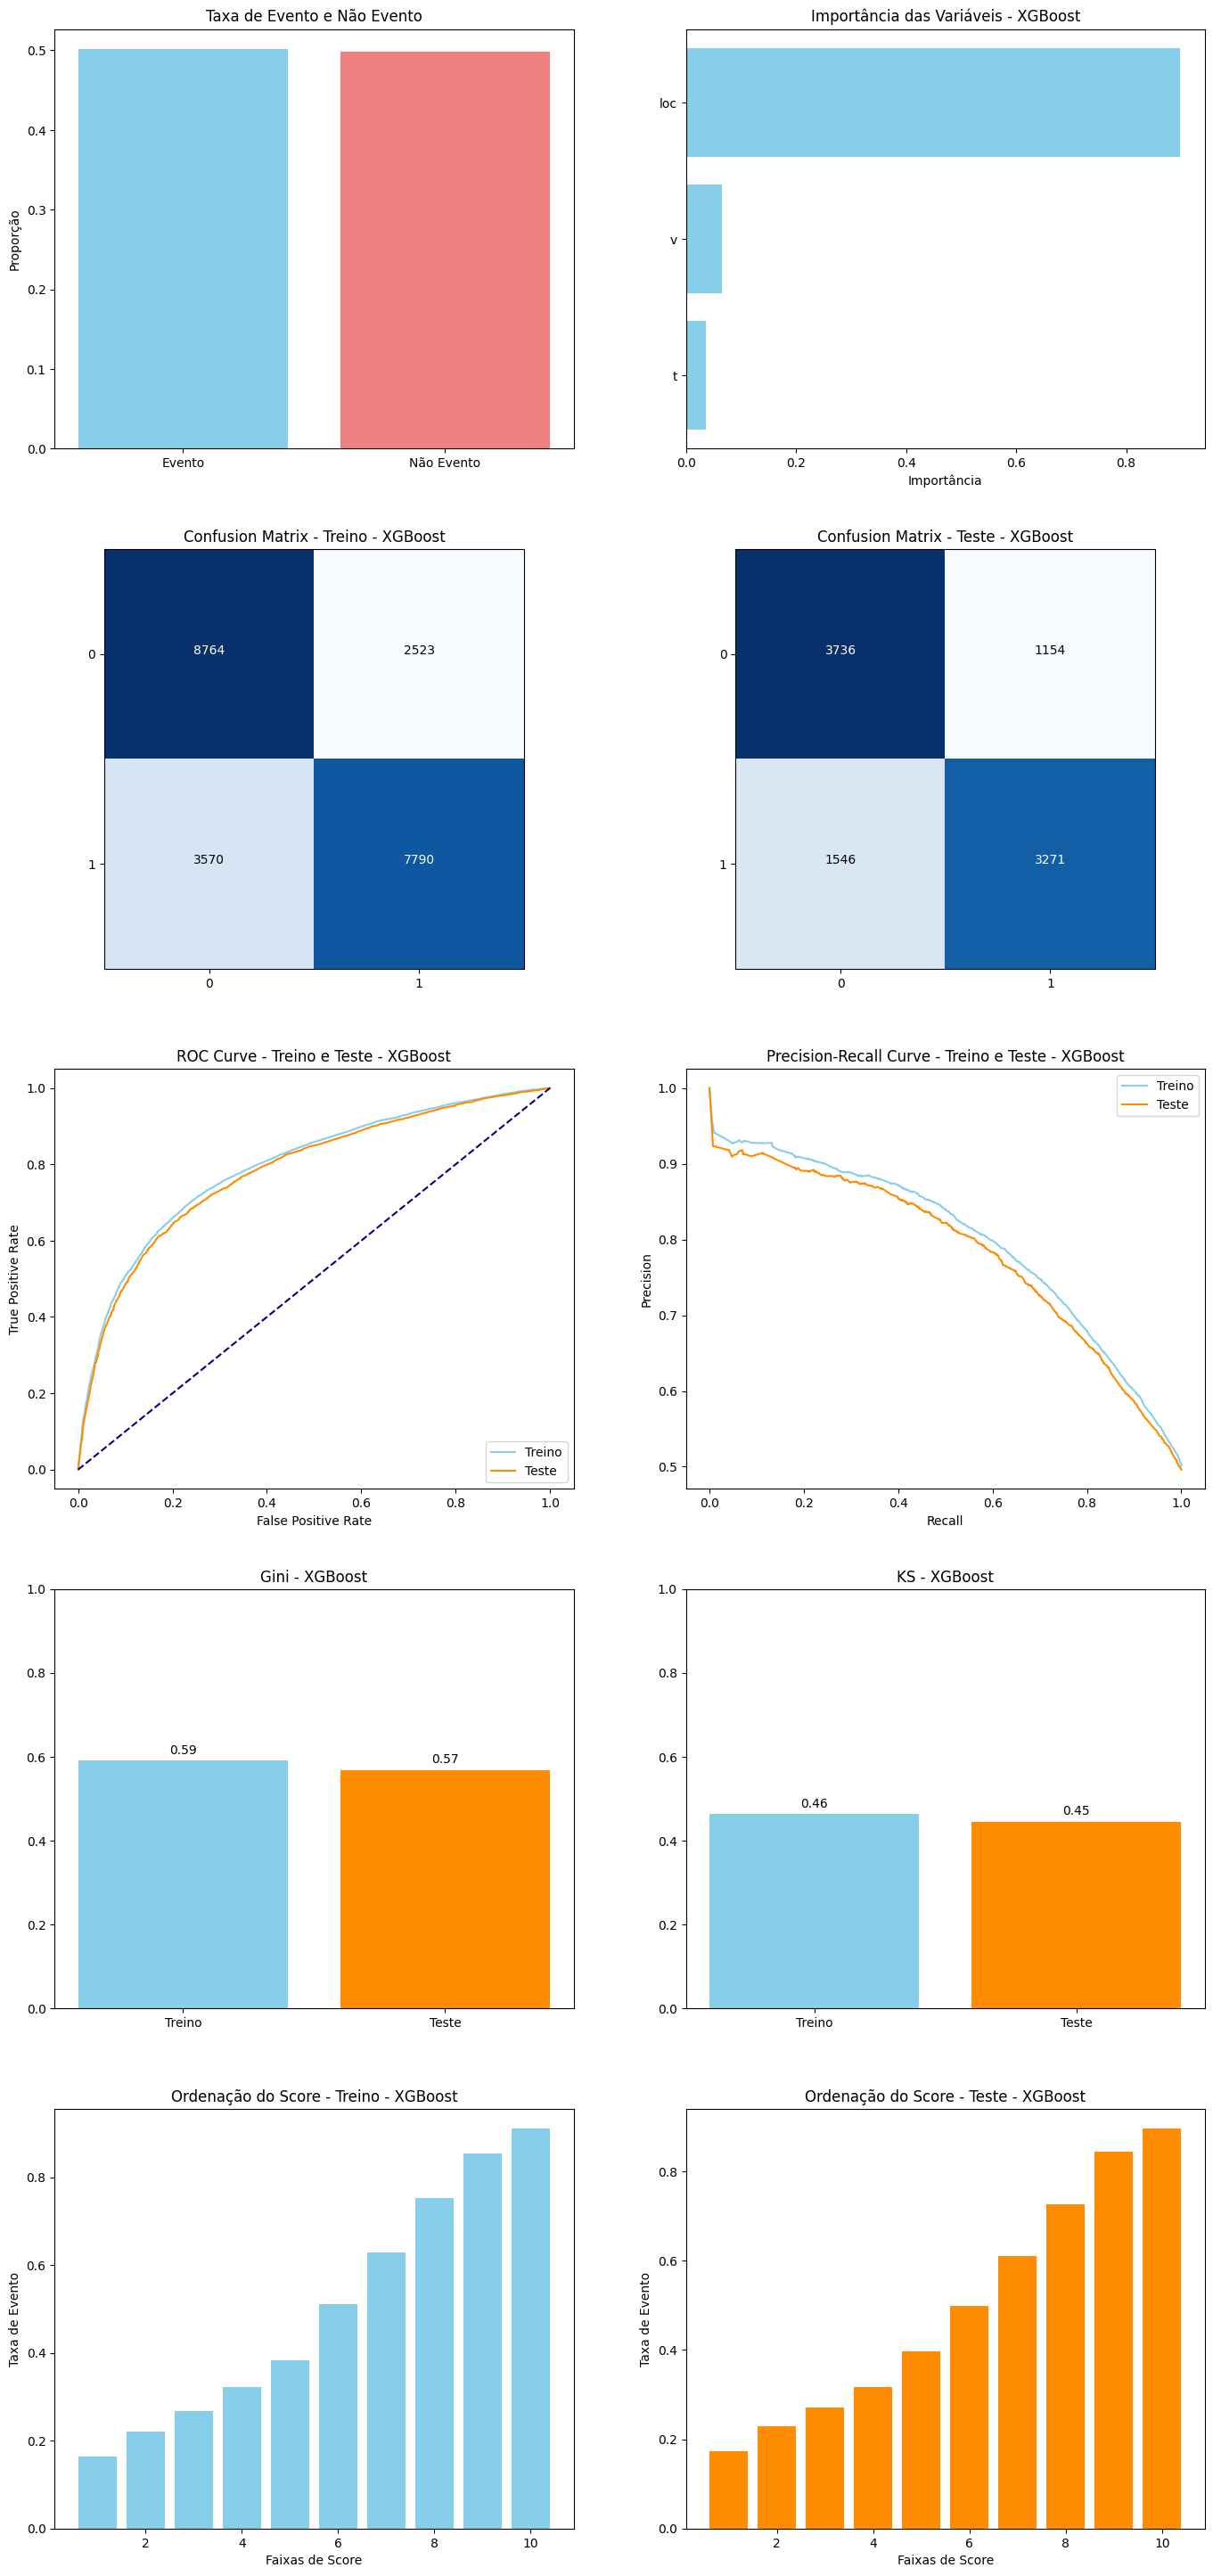

In [ ]:
fun.avaliar_modelo(X_train, y_train,X_test, y_test,best_model_xgb, nm_modelo='XGBoost')

###LightGBM

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

# Definindo o modelo
modelo_LGB = lgb.LGBMClassifier(random_state=42)

# Definindo os parâmetros para o grid search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'min_child_samples': [10, 20],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [0, 0.1]
}

#Definindo os paramatros para o Grid Search
grid_LGB = GridSearchCV(
    estimator=modelo_LGB,
    param_grid=param_grid,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2
)

# Treinando o modelo
grid_LGB.fit(X_train, y_train)

# Resultados
print("Melhores Parâmetros: ", grid_LGB.best_params_)
print("Melhor AUC: ", grid_LGB.best_score_)

# Previsões
predictions = grid_LGB.best_estimator_.predict(X_test)
predprob = grid_LGB.best_estimator_.predict_proba(X_test)

# Gini normalizado
gini_LGBM = round(fun.gini_normalizado(y_test, predprob[:, 1]), 2)
print('Gini normalizado --> ', gini_n)

# Guardando o melhor modelo
best_model_lgb = grid_LGB.best_estimator_

Fitting 3 folds for each of 256 candidates, totalling 768 fits
[LightGBM] [Info] Number of positive: 11360, number of negative: 11287
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000853 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 759
[LightGBM] [Info] Number of data points in the train set: 22647, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501612 -> initscore=0.006447
[LightGBM] [Info] Start training from score 0.006447
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

/content/pod_academy_functions.py:232: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decile_analysis = y_test.groupby(deciles).mean()
/content/pod_academy_functions.py:243: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decile_analysis_train = y_train.groupby(deciles_train).mean()


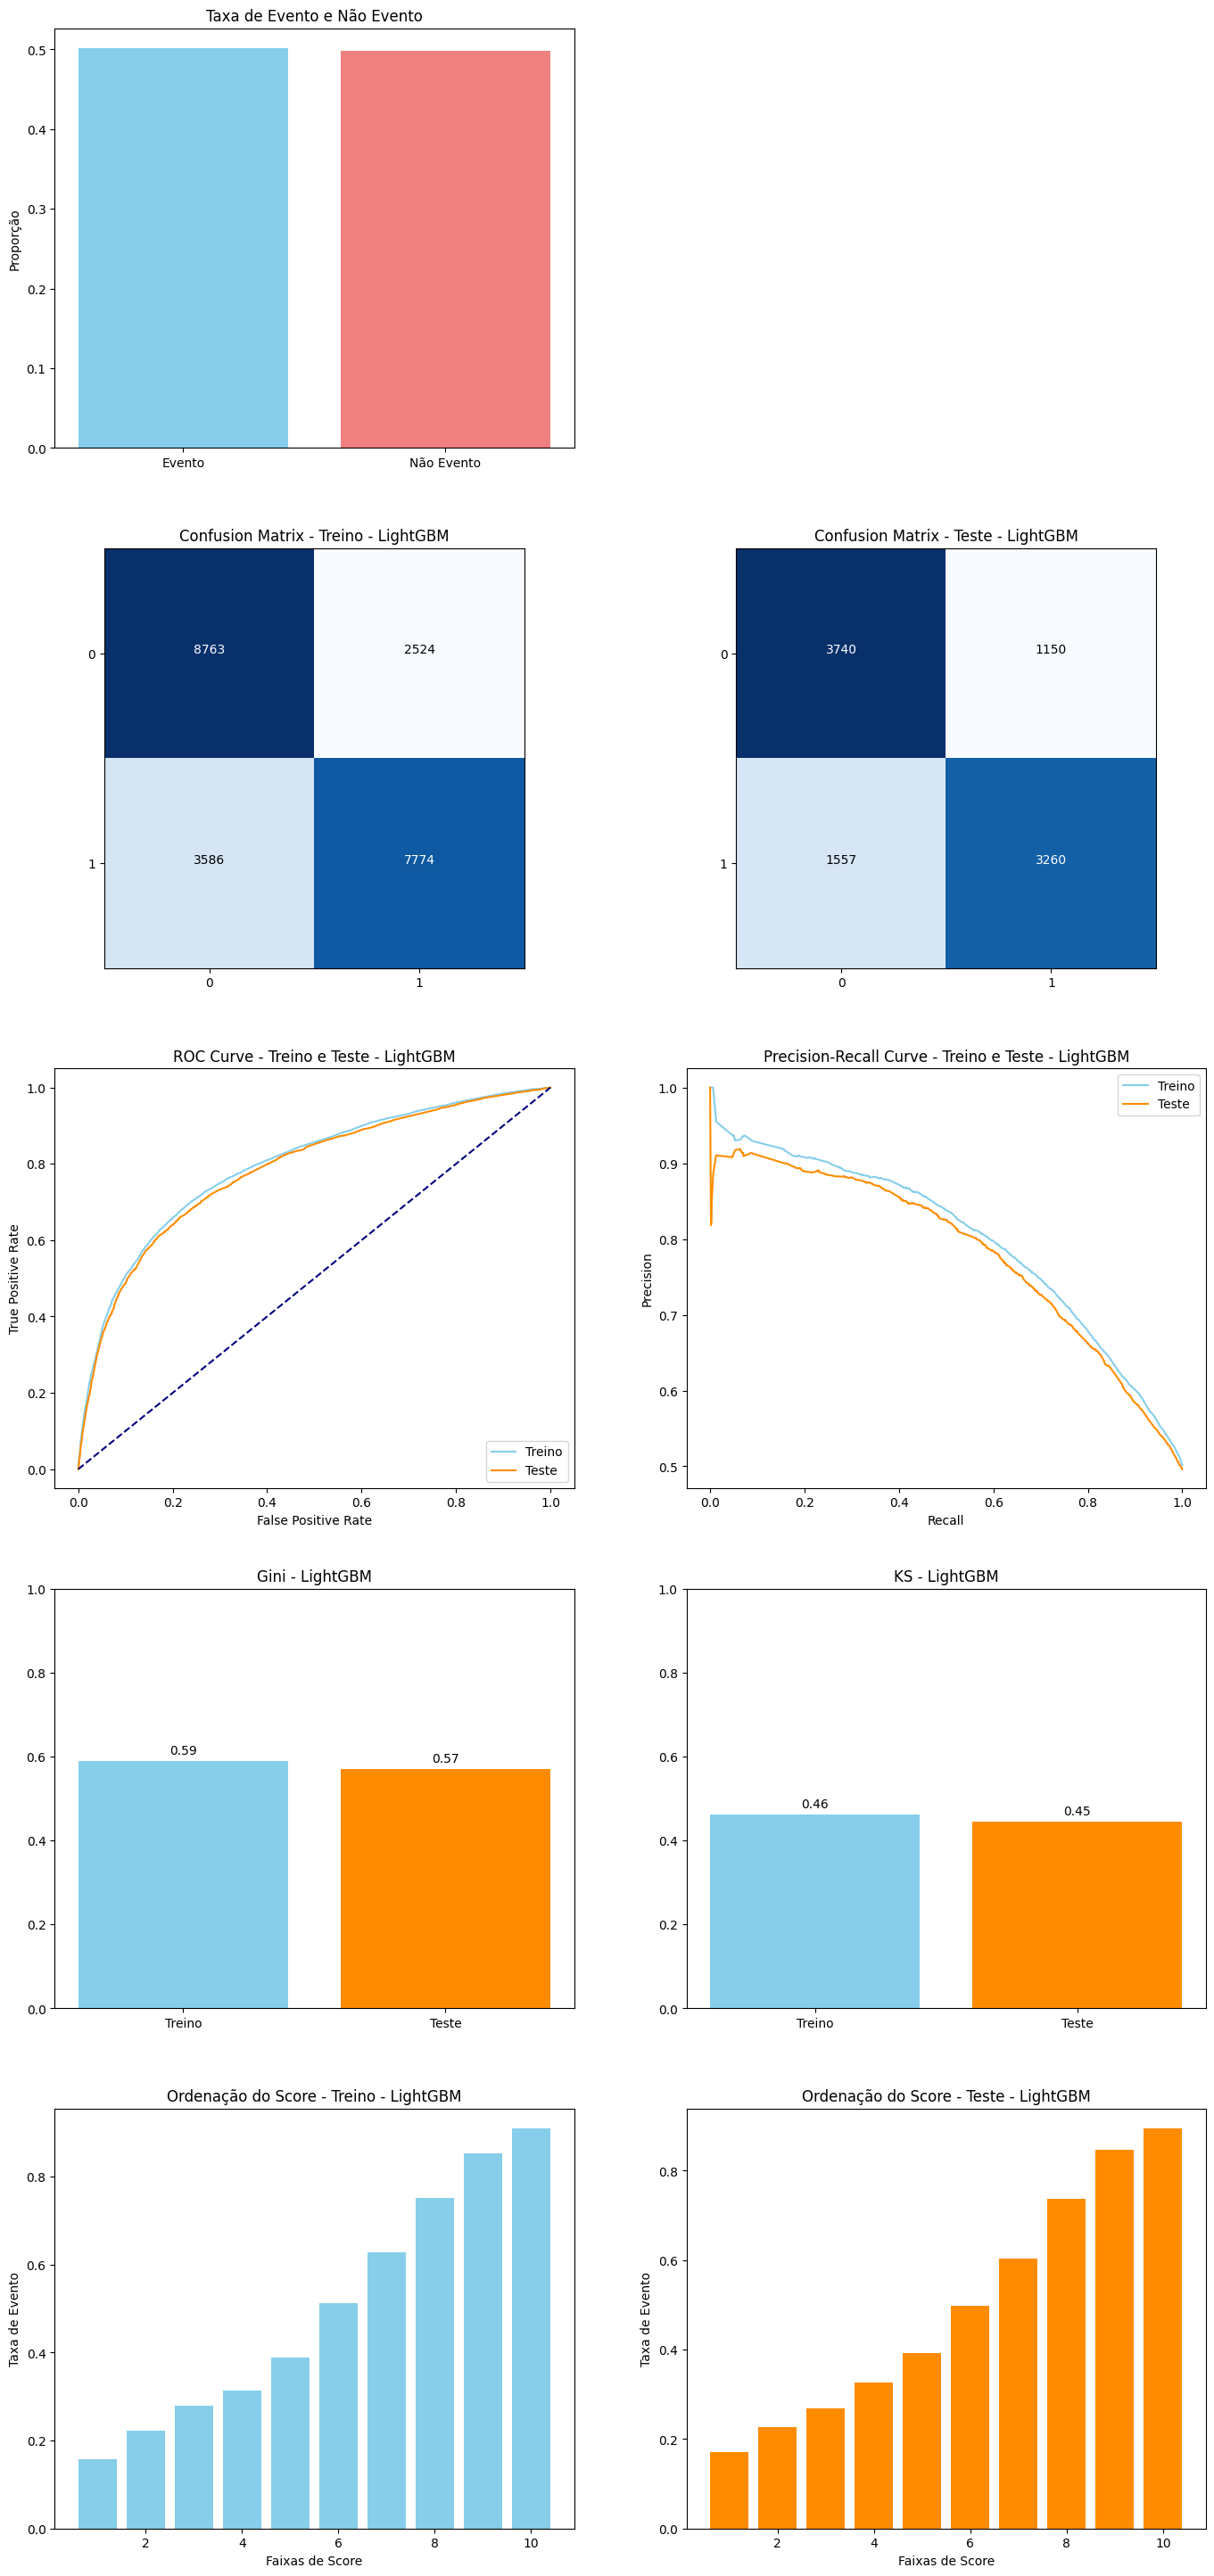

In [ ]:
fun.avaliar_modelo(X_train, y_train,X_test, y_test,grid_LGB, nm_modelo='LightGBM')

##Resultado


In [ ]:
import pandas as pd
import pickle

# Resultados já obtidos
resultados = {
    'Modelo': ['Logistic Regression','Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],
    'AUC': [grid_rf.best_score_, grid.best_score_, grid_FDC.best_score_, grid_XGB.best_score_, grid_LGB.best_score_],
    'Gini Normalizado': [gini_rl, gini_n, gini_RF, gini_XGB, gini_LGBM]
}

# Criando DataFrame
df_resultados = pd.DataFrame(resultados)

# Encontrando o melhor modelo pelo AUC
melhor_auc = df_resultados.loc[df_resultados['AUC'].idxmax()]

print("=== Comparação dos Modelos ===")
print(df_resultados)

print("\n✅ Modelo que se destacou pelo AUC:")
print(f"Modelo: {melhor_auc['Modelo']}")
print(f"AUC: {melhor_auc['AUC']}")
print(f"Gini Normalizado: {melhor_auc['Gini Normalizado']}")


=== Comparação dos Modelos ===
                Modelo       AUC  Gini Normalizado
0  Logistic Regression  0.787126             0.562
1        Decision Tree  0.787863             0.564
2        Random Forest  0.788338             0.560
3              XGBoost  0.790259             0.570
4             LightGBM  0.790026             0.570

✅ Modelo que se destacou pelo AUC:
Modelo: XGBoost
AUC: 0.7902587492966945
Gini Normalizado: 0.57


In [ ]:
with open('/content/drive/MyDrive/Banco de Dados/Detecção de Problemas em Softwares/best_model_ad_boruta.pkl', 'wb') as f:
  pickle.dump(best_model, f)

with open('/content/drive/MyDrive/Banco de Dados/Detecção de Problemas em Softwares/best_model_rf_boruta.pkl', 'wb') as f:
  pickle.dump(best_model_rf, f)

with open('/content/drive/MyDrive/Banco de Dados/Detecção de Problemas em Softwares/best_model_xgb_boruta.pkl', 'wb') as f:
  pickle.dump(best_model_xgb, f)

with open('/content/drive/MyDrive/Banco de Dados/Detecção de Problemas em Softwares/best_model_lgb_boruta.pkl', 'wb') as f:
  pickle.dump(best_model_lgb, f)


In [ ]:
df_resultados.to_csv('/content/drive/MyDrive/Banco de Dados/Detecção de Problemas em Softwares/df_resultados_boruta.csv', index=False)